# ТЕСТИРОВАНИЕ КЛАССОВ ДЛЯ ОБУЧЕНИЯ МОДЕЛЕЙ

In [6]:
import joblib
from typing import Any, Dict, List, Tuple, Type, Union, Optional
import numpy as np
from matplotlib import pyplot as plt
from sklearn.base import BaseEstimator, RegressorMixin, ClassifierMixin, ClusterMixin, is_regressor
from sklearn.utils import all_estimators
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve
from sklearn.neighbors import NearestNeighbors
from Levenshtein import distance as lev_dist
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, v_measure_score, adjusted_rand_score
# Импорт метрик для оценки модели (scores)
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, r2_score,
    d2_absolute_error_score, ndcg_score, rand_score, dcg_score, fbeta_score,
    adjusted_rand_score, silhouette_score, completeness_score, homogeneity_score,
    jaccard_score, v_measure_score, brier_score_loss, d2_tweedie_score,
    cohen_kappa_score, d2_pinball_score, mutual_info_score, adjusted_mutual_info_score,
    average_precision_score, label_ranking_average_precision_score, balanced_accuracy_score,
    top_k_accuracy_score, calinski_harabasz_score, roc_auc_score, normalized_mutual_info_score,
    fowlkes_mallows_score
)
# Импорт метрик ошибок (errors)
from sklearn.metrics import (
    max_error, mean_absolute_percentage_error, median_absolute_error,
    mean_squared_log_error, mean_squared_error, mean_absolute_error
)

scores = (
    accuracy_score, precision_score, recall_score, f1_score, r2_score,
    d2_absolute_error_score, ndcg_score, rand_score, dcg_score, fbeta_score,
    adjusted_rand_score, silhouette_score, completeness_score, homogeneity_score,
    jaccard_score, v_measure_score, brier_score_loss, d2_tweedie_score,
    cohen_kappa_score, d2_pinball_score, mutual_info_score, adjusted_mutual_info_score,
    average_precision_score, label_ranking_average_precision_score, balanced_accuracy_score,
    top_k_accuracy_score, calinski_harabasz_score, roc_auc_score
)

errors = (
    max_error, mean_absolute_percentage_error, median_absolute_error,
    mean_squared_log_error, mean_squared_error, mean_absolute_error
)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist
from sklearn.cluster import KMeans, DBSCAN
from sklearn.tree import plot_tree, BaseDecisionTree
from sklearn.ensemble import  BaggingRegressor
from sklearn.ensemble import  BaggingClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import StackingRegressor
from sklearn import ensemble

In [8]:
import warnings
from itertools import combinations

In [9]:
from catboost import CatBoostRegressor
import catboost
from sklearn.ensemble import (GradientBoostingClassifier, GradientBoostingRegressor, 
                              HistGradientBoostingClassifier, HistGradientBoostingRegressor,
                              AdaBoostClassifier, AdaBoostRegressor)
from xgboost import XGBRegressor, XGBClassifier
from lightgbm import LGBMClassifier, LGBMRegressor
from pandas import DataFrame, Series

## Рабочие классы (добавляем описание)

In [107]:
from typing import TypeVar, Generic

In [108]:
T = TypeVar('T')

In [109]:
class Model:
    """
    A versatile base class for building, training, and managing machine learning models.

    This `Model` class serves as the foundation for more specialized machine learning model classes like `Classifier`, `Regressor`, `Cluster` and `RecommendSystem`. It provides a unified interface to fit, predict, and manage various machine learning models from popular libraries like `scikit-learn`, `CatBoost`, `XGBoost`, and `LightGBM`. The class is designed to accommodate different types of models, including standard models, bagging, stacking, and boosting models.

    ### Initialization:
    - `model` (Type[BaseEstimator], optional): The specific model type to be used. This can be any model from `scikit-learn` or other supported libraries. If no model is provided during initialization, the model type must be specified later before fitting or predicting.

    ### Main Features:
    - **Versatile Model Handling:** Supports different types of models including bagging, stacking, boosting, and standard models.
    - **Unified Interface:** Provides a consistent API for fitting, predicting, saving, and loading models, regardless of their type.
    - **Automatic Model Type Checking:** Ensures that only supported models are used by checking their types during initialization.
    - **Integration with Popular Libraries:** Compatible with `scikit-learn` estimators, as well as other popular models like `CatBoost`, `XGBoost`, and `LightGBM`.

    ### Methods:
    - **fit(X, y, *args, **kwargs):** Fits the model to the provided data. The method is compatible with different model types, ensuring that the model is properly trained based on the provided input.
    - **predict(X, *args, **kwargs):** Generates predictions using the trained model. The method adapts to the specific model type, returning predictions in the appropriate format.
    - **predict_proba(X, *args, **kwargs):** For classifier models, predicts class probabilities. This method ensures that only classifiers can use this functionality.
    - **save_model(path, *args, **kwargs):** Saves the current state of the model to a file, allowing for later retrieval and reuse.
    - **load_model(cls, path, *args, **kwargs):** Loads a previously saved model from a file. This method ensures that the loaded model is of the expected type.
    - **fit_all(X, y=None, final_estimator=LogisticRegression(), min_estimator_amount=2, max_estimator_amount=5, **kwargs):** Trains multiple models or combinations of models, providing flexibility for bagging, stacking, and boosting strategies.
    - **get_params(*args, **kwargs):** Retrieves the parameters of the current model, allowing for inspection and tuning.

    ### Examples:
    ```python
    # Initializing a Model instance with a Logistic Regression model
    from sklearn.linear_model import LogisticRegression
    model_instance = Classifier(model=LogisticRegression())

    # Fitting the model
    model_instance.fit(X_train, y_train)

    # Predicting using the model
    predictions = model_instance.predict(X_test)

    # Saving the model to a file
    model_instance.save_model('model.pkl')

    # Loading the model from a file
    loaded_model = Model.load_model('model.pkl')
    ```

    ### Notes:
    - The class is designed to be extended by more specialized classes like `Classifier`, `Regressor`, `Cluster` and `RecommendSystem`, which further customize the behavior for specific tasks.
    - When using bagging, stacking, or boosting models, the `fit_all` method provides additional capabilities to handle these model types efficiently, fitting multiple models or combinations of models with ease.
    """

    def __init__(self, model: Type[BaseEstimator] = None):
        """
        Initializes an instance of the Model class.

        Parameters:
        model (Type[BaseEstimator], optional): The model to use. Defaults to None.

        Example:
        --------
        >>> from sklearn.linear_model import LogisticRegression
        >>> model_instance = Model()
        >>> model_instance.load_model('model_path')
        """
        all_models = self.__check_model_type()

        if model is not None:
            assert isinstance(model, tuple(all_models)), ('Incorrect input model type. '
                                                        f'Should be one of {self.__class__.__name__} models from sklearn or other boosting libraries')
        self.__model: BaseEstimator = model  # Приватизируем атрибут model

    @property
    def model(self):
        return self.__model

    def __check_model_type(self) -> List[Type[BaseEstimator]]:
        """
        Checks and returns the types of available models.

        Returns:
        --------
        List[Type[BaseEstimator]]: A list of model types.

        Example:
        --------
        >>> model_instance = Model()
        >>> model_instance.__check_model_type()
        [<class 'sklearn.linear_model._logistic.LogisticRegression'>, ...]
        """

        self.__model_types_with_names: List[Tuple[str, Type[BaseEstimator]]] = all_estimators(
            type_filter=self.__class__.__name__.lower())
        all_models = [t[1] for t in self.__model_types_with_names]

        # добавляем бустинги в доступные модели
        all_models += [catboost.CatBoostRegressor,  XGBRegressor,  LGBMRegressor] \
            if self.__class__.__name__ == 'Regressor'\
        else [catboost.CatBoostClassifier, XGBClassifier, LGBMClassifier]

        return all_models

    def fit(self, X: Any, y: Any = None, *args: Any, **kwargs: Any) -> None:
        assert self.__model is not None, "Model is not defined."
        self.__model.fit(X, y, *args, **kwargs)

    def predict(self, X: Any, *args: Any, **kwargs: Any) -> Any:
        assert self.__model is not None, "Model is not defined."
        return self.__model.predict(X, *args, **kwargs)

    def predict_proba(self, X: Any, *args: Any, **kwargs: Any) -> Any:
        return self.__model.predict_proba(X, *args, **kwargs)

    def save_model(self, path: str, *args: Any, **kwargs: Any) -> None:
        """
        Saves the model to a file.

        Parameters:
        -----------
        path : str
            The path to save the model.
        *args : Any
            Variable length argument list.
        **kwargs : Any
            Arbitrary keyword arguments.

        Raises:
        -------
        AssertionError: If the model is not defined.

        Example:
        --------
        >>> model_instance = Model(model=LogisticRegression())
        >>> model_instance.save_model('model.pkl')
        """
        assert self.__model is not None, "Model is not defined."
        if issubclass(self.__model, (catboost.CatBoostClassifier, catboost.CatBoostRegressor)):
            self.__model.save_model(path, **kwargs)
        joblib.dump(self, path, *args, **kwargs)  # Сохраняем текущий объект Model

    @classmethod
    def load_model(cls, path: str, *args: Any, **kwargs: Any) -> 'Model':
        """
        Loads a model from a file.

        Parameters:
        -----------
        path : str
            The path to load the model from.
        *args : Any
            Variable length argument list.
        **kwargs : Any
            Arbitrary keyword arguments.

        Returns:
        --------
        Model: An instance of the Model class with the loaded model.

        Raises:
        -------
        ValueError: If the loaded object is not an instance of the Model class.

        Example:
        --------
        >>> loaded_model_instance = Model.load_model('model.pkl')
        """
        try:
            model_instance = joblib.load(path, *args, **kwargs)
            assert isinstance(model_instance, cls), "Loaded object is not an instance of the expected class."
            return model_instance
        except:
            raise ValueError("You're tying to load incorrect model")

    def fit_all(self, X: Any, y: Any = None, final_estimator = LogisticRegression(), 
            min_estimator_amount: int = 2, max_estimator_amount: int = 5, **kwargs) -> Tuple[
            Dict[str, 'Model'], Dict[str, Exception]]:

        """
        Fit multiple machine learning models to the provided dataset.

        This method trains all available models based on the specific type of machine learning task (regression or classification). Depending on the type of model in use, it handles the fitting process differently for Bagging, Stacking, Boosting, or standard models.

        Parameters:
        -----------
        - X: Features for model training.
        - y: Target variable for supervised learning tasks. Optional for unsupervised learning.
        - final_estimator: The final estimator used in stacking models. Default is `LogisticRegression()`.
        - min_estimator_amount: Minimum number of base models to consider in stacking. Default is 2.
        - max_estimator_amount: Maximum number of base models to consider in stacking. Default is 5.
        - kwargs: Additional parameters for model initialization.

        Returns:
        --------
        - fitted_models: A dictionary where keys are model names (or combinations of model names) and values are `Model` instances of the fitted models.
        - error_fitting: A dictionary where keys are model names (or combinations of model names) and values are exceptions raised during the fitting process, if any.

        Raises:
        -------
        - AssertionError: If the model type is unsupported or improperly defined.

        Notes:
        ------
        - For Bagging models, the method uses either `BaggingRegressor` or `BaggingClassifier` based on the type of the main model and fits them with various base estimators.
        - For Stacking models, it iterates through all possible combinations of base models within the specified range and fits a stacking model using the provided `final_estimator`.
        - For Boosting models (including CatBoost, XGBoost, LightGBM, etc.), it fits the respective boosting model directly.
        - For standard models, it simply fits each available model type without additional wrapping.
        - The method captures and prints any warnings generated during the fitting process, ensuring that only unique warnings are displayed.
        - The method is designed to handle multiple models, making it versatile for different types of machine learning tasks.

        Example:
        --------
        >>> model = Classifier(CatboostClassifier())
        >>> fitted_models, errors = model.fit_all(X_train, y_train)
        """

        fitted_models: Dict[str, 'Model'] = {}
        error_fitting: Dict[str, Exception] = {}
        unique_warnings = set()

        # для бэггинга отдельно
        if self.model.__class__.__name__.startswith('Bagging'):
            print(f'!Bagging models! \n')

            for model_name, model_type in self.__model_types_with_names:
                model = BaggingRegressor if is_regressor(self.model) else BaggingClassifier
                try:
                    # Перехват предупреждений
                    with warnings.catch_warnings(record=True) as w:
                        warnings.simplefilter("always")
                        model_instance = model(estimator=model_type(), **kwargs)
                        model_instance.fit(X, y)
                        fitted_models[model_name] = self.__class__(model_instance)

                        # Сбор уникальных сообщений предупреждений
                        for warning in w:
                            warning_msg = str(warning.message)
                            if warning_msg not in unique_warnings:
                                unique_warnings.add(warning_msg)
                except Exception as e:
                    error_fitting[model_name] = e
                if unique_warnings:
                    print(f"{model_name}:")
                    for warning in unique_warnings:
                        print(f"- {warning}")
        # для стекинга
        elif self.model.__class__.__name__.startswith('Stacking'):
            print(f'!Stacking models! \n')
            for estimator_amount in range(min_estimator_amount, max_estimator_amount+1):  # перебираем все нужные наборы моделей
                combo_estimators = list(combinations(self.__model_types_with_names, estimator_amount))
                for estimators in combo_estimators:
                    model = StackingRegressor if is_regressor(self.model) else StackingClassifier

                    estimators = [(i[0], i[1]()) for i in estimators]
                    estim_names = ''
                    for i in estimators:
                        estim_names += i[0] + ' '

                    try:
                        # Перехват предупреждений
                        with warnings.catch_warnings(record=True) as w:
                            warnings.simplefilter("always")
                            model_instance = model(estimators=estimators,
                                                final_estimator=final_estimator, **kwargs)
                            model_instance.fit(X, y)
                            fitted_models[estim_names] = self.__class__(model_instance)

                            # Сбор уникальных сообщений предупреждений
                            for warning in w:
                                warning_msg = str(warning.message)
                                if warning_msg not in unique_warnings:
                                    unique_warnings.add(warning_msg)
                    except Exception as e:
                        error_fitting[estim_names] = e
                    if unique_warnings:
                        print(f"{estim_names}:")
                        for warning in unique_warnings:
                            print(f"- {warning}")
        # для бустинга
        elif self.model.__class__ in (catboost.CatBoostRegressor, catboost.CatBoostClassifier,
                                               GradientBoostingClassifier, GradientBoostingRegressor, 
                                                HistGradientBoostingClassifier, HistGradientBoostingRegressor,
                                                AdaBoostClassifier, AdaBoostRegressor,
                                                XGBRegressor, XGBClassifier,
                                                LGBMClassifier, LGBMRegressor):
            print(f'!Boosting models! \n')

            boost_regressors = (catboost.CatBoostRegressor, 
                                GradientBoostingRegressor, 
                                HistGradientBoostingRegressor,
                                AdaBoostRegressor,
                                XGBRegressor,
                                LGBMRegressor)
            boost_classifiers = (catboost.CatBoostClassifier,
                                GradientBoostingClassifier,
                                HistGradientBoostingClassifier,
                                AdaBoostClassifier,
                                XGBClassifier,
                                LGBMClassifier)
            boost_models = boost_regressors if self.model.__class__.__name__ == 'regressor' else boost_classifiers
            for model in boost_models:
                try:
                    # Перехват предупреждений
                        with warnings.catch_warnings(record=True) as w:
                            warnings.simplefilter("always")
                            model_instance = model(**kwargs)
                            model_instance.fit(X, y)
                            fitted_models[model.__name__] = self.__class__(model_instance)

                            # Сбор уникальных сообщений предупреждений
                            for warning in w:
                                warning_msg = str(warning.message)
                                if warning_msg not in unique_warnings:
                                    unique_warnings.add(warning_msg)
                except Exception as e:
                    error_fitting[model.__name__] = e
                if unique_warnings:
                    print(f"{model.__name__}:")
                    for warning in unique_warnings:
                        print(f"- {warning}")
        # для обычных моделей
        else:
            print(f'!Default models! \n')

            for model_name, model_type in self.__model_types_with_names:
                try:
                    with warnings.catch_warnings(record=True) as w:
                        warnings.simplefilter("always")
                        model_instance = model_type()
                        model_instance.fit(X, y)
                        wrapped_model = self.__class__(model_instance)
                        fitted_models[model_name] = wrapped_model

                        # Сбор уникальных сообщений предупреждений
                        for warning in w:
                            warning_msg = str(warning.message)
                            if warning_msg not in unique_warnings:
                                unique_warnings.add(warning_msg)
                except Exception as e:
                    error_fitting[model_name] = e
                if unique_warnings:
                    print(f"{model_name}:")
                    for warning in unique_warnings:
                        print(f"- {warning}")

            
        return fitted_models, error_fitting

    def get_params(self, *args: Any, **kwargs: Any) -> Dict[str, Any]:
        """
        Gets parameters of the model.

        Parameters:
        -----------
        *args : Any
            Variable length argument list.
        **kwargs : Any
            Arbitrary keyword arguments.

        Returns:
        --------
        Dict[str, Any]: Model parameters.

        Raises:
        -------
        AssertionError: If the model is not defined.

        Example:
        --------
        >>> model_instance = Model(model=LogisticRegression())
        >>> params = model_instance.get_params()
        """
        assert self.__model is not None, "Model is not defined."
        return self.__model.get_params(*args, **kwargs)

In [110]:
class Regressor(Model, RegressorMixin):
    """
    The `Regressor` class is a specialized subclass of the `Model` class, designed specifically for handling regression tasks. It integrates the functionality of scikit-learn's `RegressorMixin`, which provides standard methods for regression models, and adds a comprehensive reporting tool for evaluating regression model performance.

    ### Overview:
    - **Core Inheritance**: Inherits from the `Model` class and `RegressorMixin`, making it compatible with all regression models supported by scikit-learn and other popular libraries.
    - **Main Method**:
    - `report`: Generates a detailed report of regression metrics, allowing for an in-depth evaluation of model predictions.

    ### Key Attributes:
    - `model`: Inherited from the `Model` class, this attribute holds the specific regression model instance being used.

    ### Usage:
    The `Regressor` class is intended to be used for regression tasks where evaluating the model's performance through a variety of metrics is crucial. Users can instantiate the class with any regression model and utilize the `report` method to assess how well the model performs on test data.

    ### Example:
    ```python
    >>> from sklearn.linear_model import LinearRegression
    >>> from sklearn.model_selection import train_test_split
    >>> from sklearn.datasets import make_regression

    >>> # Generate a synthetic regression dataset
    >>> X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

    >>> X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    >>> # Instantiate the Regressor class with a specific regression model
    >>> regressor_instance = Regressor(model=LinearRegression())

    >>> regressor_instance.fit(X_train, y_train)

    >>> predictions = regressor_instance.predict(X_test)

    >>> # Generate a report of regression metrics
    >>> metrics_report = regressor_instance.report(y_test, predictions)
    >>> print(metrics_report)
    {'r2_score': 0.999, 'mean_absolute_error': 0.08, 'mean_squared_error': 0.009, ...}
    """

    def __init__(self, model: Type[BaseEstimator] = None) -> None:
        """
        Initializes an instance of the Regressor class.

        Parameters:
        -----------
        model : Type[BaseEstimator], optional
            The regression model to use. Defaults to None.

        Example:
        --------
        >>> from sklearn.linear_model import LinearRegression
        >>> regressor_instance = Regressor(model=LinearRegression())
        """
        super().__init__(model)
    
    def report(self, y_true, y_pred):
        """
        Generates a report of regression metrics based on the true and predicted values.

        Parameters:
        -----------
        y_true : array-like
            True target values.
        y_pred : array-like
            Predicted target values.

        Returns:
        --------
        dict : A dictionary containing various regression metrics:
            - 'r2_score': R^2 (coefficient of determination) regression score.
            - 'mean_absolute_error': Mean absolute error regression loss.
            - 'mean_squared_error': Mean squared error regression loss.
            - 'max_error': Maximum residual error.
            - 'mean_absolute_percentage_error': Mean absolute percentage error regression loss.
            - 'median_absolute_error': Median absolute error regression loss.
            - 'mean_squared_log_error': Mean squared logarithmic error regression loss.
            - 'd2_absolute_error_score': D^2 (coefficient of determination) regression score based on absolute error.
            - 'root_mean_squared_error': Root mean squared error regression loss.
            - 'root_mean_squared_log_error': Root mean squared logarithmic error regression loss.

        Example:
        --------
        >>> y_true = [3.0, -0.5, 2.0, 7.0]
        >>> y_pred = [2.5, 0.0, 2.0, 8.0]
        >>> regressor_instance = Regressor(model=LinearRegression())
        >>> metrics_report = regressor_instance.report(y_true, y_pred)
        >>> print(metrics_report)
        {'r2_score': 0.9486081370449679, ...}
        """

        metrics = {
        'r2_score': lambda y_true, y_pred: r2_score(y_true, y_pred),
        'mean_absolute_error': lambda y_true, y_pred: mean_absolute_error(y_true, y_pred),
        'mean_squared_error': lambda y_true, y_pred: mean_squared_error(y_true, y_pred),
        'max_error': lambda y_true, y_pred: max_error(y_true, y_pred),
        'mean_absolute_percentage_error': lambda y_true, y_pred: mean_absolute_percentage_error(y_true, y_pred),
        'median_absolute_error': lambda y_true, y_pred: median_absolute_error(y_true, y_pred),
        'mean_squared_log_error': lambda y_true, y_pred: mean_squared_log_error(y_true, y_pred),
        'd2_absolute_error_score': lambda y_true, y_pred: d2_absolute_error_score(y_true, y_pred),
        'root_mean_squared_error': lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
        'root_mean_squared_log_error': lambda y_true, y_pred: np.sqrt(mean_squared_log_error(y_true, y_pred)),
        }

        result = {}
        
        for metric_name, metric_func in metrics.items():
            try:
                result[metric_name] = metric_func(y_true, y_pred)
            except Exception as e:
                print(f"Error calculating {metric_name}: {e}")
        return result

In [111]:
class Classifier(Model, ClassifierMixin):
    """
    The `Classifier` class is an advanced subclass of the `Model` class, specifically designed for classification tasks. It leverages the capabilities of scikit-learn's `ClassifierMixin`, making it suitable for various classification models. The class provides a suite of tools to evaluate, visualize, and interpret the performance of classification models.

    ### Overview:
    - **Core Inheritance**: Inherits from the `Model` class and `ClassifierMixin`, ensuring compatibility with all major classification models in scikit-learn and similar libraries.
    - **Key Methods**:
    - `roc_auc_plot`: Plots the ROC (Receiver Operating Characteristic) curve, which helps in assessing the performance of the classifier.
    - `confusion_matrix_display`: Displays the confusion matrix, giving insight into the performance of the classifier in terms of true and false positives/negatives.
    - `test_tree_classification`: Visualizes decision boundaries for tree-based classifiers, aiding in understanding model decisions.
    - `tree_plot`: Generates a visual representation of a decision tree model, useful for interpreting tree-based classifiers.
    - `report`: Provides a comprehensive report of various classification metrics, offering a detailed evaluation of the model's performance.

    ### Key Attributes:
    - `model`: Inherited from the `Model` class, this attribute holds the specific classification model instance being used.

    ### Usage:
    The `Classifier` class is intended for use in classification tasks where model evaluation, visualization, and interpretation are critical. It is designed to work with a variety of classifiers, particularly those based on decision trees, but is versatile enough for broader applications.

    ### Example:
    ```python
    >>> from sklearn.ensemble import RandomForestClassifier
    >>> from sklearn.model_selection import train_test_split
    >>> from sklearn.datasets import make_classification
    >>> import pandas as pd

    >>> # Generate a synthetic classification dataset
    >>> X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

    >>> # Split the dataset into training and testing sets
    >>> X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    >>> # Instantiate the Classifier class with a RandomForest model
    >>> classifier_instance = Classifier(model=RandomForestClassifier())

    >>> # Fit the model to the training data
    >>> classifier_instance.fit(X_train, y_train)

    >>> # Predict using the fitted model
    >>> predictions = classifier_instance.predict(X_test)

    >>> # Generate a report of classification metrics
    >>> metrics_report = classifier_instance.report(y_test, predictions)
    >>> print(metrics_report)
    {'accuracy_score': 0.95, ...}

    >>> # Plot the ROC curve
    >>> y_score = classifier_instance.predict_proba(X_test)[:, 1]
    >>> classifier_instance.roc_auc_plot(y_test, y_score)

    >>> # Display the Confusion Matrix
    >>> classifier_instance.confusion_matrix_display(X_test, y_test)

    >>> # Visualize decision boundaries (for a decision tree classifier)
    >>> classifier_instance.test_tree_classification(pd.DataFrame(X_train, columns=['feature1', 'feature2']), pd.Series(y_train), cy=y_train)
        """

    def __init__(self, model: Type[BaseEstimator] = None) -> None:
        """
        Initializes an instance of the Classifier class.

        Parameters:
        -----------
        model : Type[BaseEstimator], optional
            The classification model to use. Defaults to None.

        Example:
        --------
        >>> from sklearn.ensemble import RandomForestClassifier
        >>> classifier_instance = Classifier(model=RandomForestClassifier())
        """
        super().__init__(model)

    

    def roc_auc_plot(self, y_true: Any, y_score: Any, *args: Any,
                     **kwargs: Any) -> None:
        """
        Plots the ROC (Receiver Operating Characteristic) curve.

        Parameters:
        -----------
        y_true : array-like
            True target values.
        y_score : array-like
            Predicted scores.
        *args : Any
            Variable length argument list.
        **kwargs : Any
            Arbitrary keyword arguments.

        Returns:
        --------
        None

        Example:
        --------
        >>> y_true = [0, 1, 1, 0]
        >>> y_score = [0.1, 0.4, 0.35, 0.8]
        >>> classifier_instance.roc_auc_plot(y_true, y_score)
        """
        fpr, tpr, _ = roc_curve(y_true, y_score, *args, **kwargs)
        roc_auc = roc_auc_score(y_true, y_score)

        plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('FPR')
        plt.ylabel('TPR')
        plt.title('ROC curve')
        plt.legend(loc="lower right")
        plt.show()

    def confusion_matrix_display(self, x_test: Any, y_test: Any, *args: Any,
                                 **kwargs: Any) -> ConfusionMatrixDisplay:
        """
        Displays the Confusion Matrix.

        Parameters:
        -----------
        x_test : Any
            Test data.
        y_test : Any
            True target values.
        *args : Any
            Variable length argument list.
        **kwargs : Any
            Arbitrary keyword arguments.

        Returns:
        --------
        None

        Example:
        --------
        >>> x_test = [[0, 1], [1, 0]]
        >>> y_test = [0, 1]
        >>> classifier_instance.confusion_matrix_display(x_test, y_test)
        """
        ConfusionMatrixDisplay.from_estimator(self.model, x_test, y_test, *args, **kwargs)
        plt.show()
    
    def __gini(self, y_true, y_pred):
        """
        Computes the Gini coefficient.

        Parameters:
        -----------
        y_true : array-like
            True target values.
        y_pred : array-like
            Predicted values.

        Returns:
        --------
        float : Gini coefficient.
        """

        return 2 * roc_auc_score(y_true, y_pred) - 1
    
    def __get_grid(self, data):
        """
        Generate a grid for plotting decision boundaries.

        Parameters:
        -----------
        data : array-like
            Input data for which to generate the grid.

        Returns:
        --------
        tuple: Meshgrid arrays for plotting.
        """

        x_min, x_max = data[:, 0].min() - 0.5, data[:, 0].max() + 0.5
        y_min, y_max = data[:, 1].min() - 0.5, data[:, 1].max() + 0.5
        return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    
    def test_tree_classification(self, X, y, cy=0, fit_clf=True):
        """
        Test and plot decision boundaries for a tree-based classifier.

        Parameters:
        -----------
        X : pd.DataFrame
            Input features.
        y : pd.DataFrame or pd.Series
            True target values.
        cy : array-like, optional
            Colors for plotting the scatter points. Defaults to 0.
        fit_clf : bool, optional
            If True, fit the classifier before plotting. Defaults to True.

        Returns:
        --------
        model: The fitted model, if fit_clf is True.

        Example:
        --------
        >>> from sklearn.tree import DecisionTreeClassifier
        >>> import pandas as pd
        >>> X = pd.DataFrame({'feature1': [1, 2, 3, 4], 'feature2': [5, 6, 7, 8]})
        >>> y = pd.Series([0, 1, 0, 1])
        >>> model = DecisionTreeClassifier()
        >>> cluster_instance = Classifier(model)
        >>> cluster_instance.test_tree_classification(X, y, cy=y['target'])
        """

        valid_models = ('DecisionTreeClassifier', 'RandomForestClassifier', 'ExtraTreesClassifier')
        assert self.model.__class__.__name__ in valid_models, f'Model must be an instance of the tree class. Valid models: {valid_models}'
        assert isinstance(X, pd.DataFrame), f'Incorrect X paramnetr type. {type(X)} instead of {pd.DataFrame}'
        assert isinstance(y, (pd.DataFrame, pd.Series)), f'Incorrect y paramnetr type. {type(y)} instead of {pd.DataFrame | pd.Series}'

        xx, yy = self.__get_grid(X.values)

        if fit_clf:
            self.model.fit(X, y)

        predicted = self.model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

        plt.figure(figsize=(8, 8))
        plt.pcolormesh(xx, yy, predicted, cmap='Pastel1')
        plt.scatter(X.values[:, 0], X.values[:, 1], s=50, cmap='tab10', c=cy)
        plt.xlabel(X.columns[0])
        plt.ylabel(X.columns[1])
        plt.show()

        if fit_clf:
            return self.model
        
    def tree_plot(self, **kwargs):
        """
        Plot the tree structure of a decision tree model.

        Parameters:
        -----------
        kwargs : Additional keyword arguments for the tree plotting function. Possible parameters include:
            - feature_names : list of str
                Names of each of the features.
            - class_names : list of str or bool
                Names of each of the target classes. If True, shows the string representation of the class.
            - filled : bool
                When set to True, paint nodes to indicate the majority class for classification, extremity of values for regression, or purity of node for multi-output.
            - rounded : bool
                When set to True, draw node boxes with rounded corners and use Helvetica fonts instead of Times-Roman.
            - proportion : bool
                When set to True, change the display of 'values' and/or 'samples' to be proportions and percentages instead of absolute numbers.
            - precision : int
                Number of decimal places to display.

        Returns:
        --------
        None

        Example:
        --------
        >>> from sklearn.tree import DecisionTreeClassifier
        >>> X = pd.DataFrame({'feature1': [1, 2, 3, 4], 'feature2': [5, 6, 7, 8]})
        >>> y = pd.Series([0, 1, 0, 1])
        >>> model = DecisionTreeClassifier().fit(X, y)
        >>> cluster_instance = Classifier(model)
        >>> cluster_instance.tree_plot(feature_names=X.columns, class_names=['Class 0', 'Class 1'], filled=True)
        """
        assert isinstance(self.model, BaseDecisionTree), 'Model must be an instance of the tree class'
        plot_tree(self.model, **kwargs)
        plt.show()
    
    def report(self, y_true, y_pred):
        """
        Generates a report of classification metrics based on the true and predicted values.

        Parameters:
        -----------
        y_true : array-like
            True target values.
        y_pred : array-like
            Predicted target values.

        Returns:
        --------
        dict : A dictionary containing various classification metrics:
            - 'accuracy_score': Accuracy classification score.
            - 'precision_score': Precision classification score.
            - 'recall_score': Recall classification score.
            - 'f1_score': F1 score.
            - 'd2_absolute_error_score': D^2 (coefficient of determination) regression score based on absolute error.
            - 'ndcg_score': Normalized Discounted Cumulative Gain score.
            - 'dcg_score': Discounted Cumulative Gain score.
            - 'fbeta_score': F-beta score.
            - 'completeness_score': Completeness score.
            - 'homogeneity_score': Homogeneity score.
            - 'jaccard_score': Jaccard similarity coefficient score.
            - 'brier_score_loss': Brier score loss.
            - 'd2_tweedie_score': D^2 (coefficient of determination) regression score for Tweedie distribution.
            - 'cohen_kappa_score': Cohen's kappa score.
            - 'd2_pinball_score': D^2 (coefficient of determination) regression score based on pinball loss.
            - 'mutual_info_score': Mutual information score.
            - 'adjusted_mutual_info_score': Adjusted mutual information score.
            - 'average_precision_score': Average precision score.
            - 'label_ranking_average_precision_score': Label ranking average precision score.
            - 'balanced_accuracy_score': Balanced accuracy classification score.
            - 'top_k_accuracy_score': Top-k accuracy classification score.
            - 'roc_auc_score': ROC AUC score.
            - '__gini': Gini coefficient.

        Example:
        --------
        >>> y_true = [0, 1, 1, 0]
        >>> y_pred = [0.1, 0.4, 0.35, 0.8]
        >>> metrics_report = classifier_instance.report(y_true, y_pred)
        >>> print(metrics_report)
        {'accuracy_score': 0.75, ...}
        """

        metrics = {
        'accuracy_score': lambda y_true, y_pred: accuracy_score(y_true, y_pred),
        'precision_score': lambda y_true, y_pred: precision_score(y_true, y_pred),
        'recall_score': lambda y_true, y_pred: recall_score(y_true, y_pred),
        'f1_score': lambda y_true, y_pred: f1_score(y_true, y_pred),
        'd2_absolute_error_score': lambda y_true, y_pred: d2_absolute_error_score(y_true, y_pred),
        'ndcg_score': lambda y_true, y_pred: ndcg_score(y_true, y_pred),
        'dcg_score': lambda y_true, y_pred: dcg_score(y_true, y_pred),
        'fbeta_score': lambda y_true, y_pred: fbeta_score(y_true, y_pred),
        'completeness_score': lambda y_true, y_pred: completeness_score(y_true, y_pred),
        'homogeneity_score': lambda y_true, y_pred: homogeneity_score(y_true, y_pred),
        'jaccard_score': lambda y_true, y_pred: jaccard_score(y_true, y_pred),
        'brier_score_loss': lambda y_true, y_pred: brier_score_loss(y_true, y_pred),
        'd2_tweedie_score': lambda y_true, y_pred: d2_tweedie_score(y_true, y_pred),
        'cohen_kappa_score': lambda y_true, y_pred: cohen_kappa_score(y_true, y_pred),
        'd2_pinball_score': lambda y_true, y_pred: d2_pinball_score(y_true, y_pred),
        'mutual_info_score': lambda y_true, y_pred: mutual_info_score(y_true, y_pred),
        'adjusted_mutual_info_score': lambda y_true, y_pred: adjusted_mutual_info_score(y_true, y_pred),
        'average_precision_score': lambda y_true, y_pred: average_precision_score(y_true, y_pred),
        'label_ranking_average_precision_score': lambda y_true, y_pred: label_ranking_average_precision_score(y_true, y_pred),
        'balanced_accuracy_score': lambda y_true, y_pred: balanced_accuracy_score(y_true, y_pred),
        'top_k_accuracy_score': lambda y_true, y_pred: top_k_accuracy_score(y_true, y_pred),
        'roc_auc_score': lambda y_true, y_pred: roc_auc_score(y_true, y_pred),
        'gini': lambda y_true, y_pred: self.__gini(y_true, y_pred)
        }

        result = {}

        for metric_name, metric_func in metrics.items():
            try:
                result[metric_name] = metric_func(y_true, y_pred)
            except Exception as e:
                print(f"Error calculating {metric_name}: {e}")

        return result

In [112]:
class Cluster(Model, ClusterMixin):
    """
    Cluster Class

    Description:
    ------------
    The `Cluster` class is an advanced subclass of the `Model` class, specifically designed for clustering tasks. It leverages the capabilities of scikit-learn's `ClusterMixin`, making it suitable for various clustering models. The class provides a suite of tools to evaluate, visualize, and interpret the performance of clustering models.

    ### Overview:
    - **Core Inheritance**: Inherits from the `Model` class and `ClusterMixin`, ensuring compatibility with all major clustering models in scikit-learn and similar libraries.
    - **Key Methods**:
    - `elbow_method`: Determines the optimal number of clusters by calculating the within-cluster sum of squares (WCSS) for different numbers of clusters, optionally updating the model's number of clusters.
    - `elbow_method_plot`: Plots the WCSS values to visualize the elbow point, aiding in the determination of the optimal number of clusters.
    - `dendrogram_plot`: Generates and displays a dendrogram for agglomerative clustering, providing insights into the hierarchical structure of the clusters.
    - `report`: Provides a comprehensive report of various clustering metrics, offering a detailed evaluation of the model's performance.

    ### Key Attributes:
    - `model`: Inherited from the `Model` class, this attribute holds the specific clustering model instance being used.
    - `labels_`: Provides access to the cluster labels assigned by the model.
    - `n_clusters`: Represents the number of clusters used by the model, which can be updated through the `elbow_method`.

    ### Usage:
    The `Cluster` class is intended for use in clustering tasks where model evaluation, visualization, and interpretation are critical. It is designed to work with a variety of clustering algorithms, including K-Means, MiniBatchKMeans, and Agglomerative Clustering, making it versatile for different types of clustering applications.

    ### Example:

    ```python
    >>> from sklearn.cluster import KMeans
    >>> from sklearn.datasets import make_blobs
    >>> import numpy as np

    >>> # Generate a synthetic dataset for clustering
    >>> X, _ = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=42)

    >>> # Instantiate the Cluster class with a KMeans model
    >>> cluster_instance = Cluster(model=KMeans())

    >>> # Apply the elbow method to determine the optimal number of clusters
    >>> wcss = cluster_instance.elbow_method(X, max_k=10)
    >>> print(wcss)

    >>> # Plot the WCSS to visualize the elbow point
    >>> cluster_instance.elbow_method_plot(wcss)

    >>> # Fit the model with the optimal number of clusters and generate a report
    >>> metrics_report = cluster_instance.report(X)
    >>> print(metrics_report)

    >>> # For agglomerative clustering, plot the dendrogram
    >>> from sklearn.cluster import AgglomerativeClustering
    >>> model = AgglomerativeClustering().fit(X)
    >>> cluster_instance = Cluster(model=model)
    >>> cluster_instance.dendrogram_plot(truncate_mode='level', p=3)
    """


    def __init__(self, model: Type[BaseEstimator] = None) -> None:
        """
        Initializes an instance of the Cluster class.

        Parameters:
        -----------
        model : Type[BaseEstimator], optional
            The clustering model to use. Defaults to None.

        Example:
        --------
        >>> from sklearn.cluster import DBSCAN
        >>> classifier_instance = Classifier(model=DBSCAN())
        """
        super().__init__(model)

    @property
    def labels_(self):
        return self.model.labels_
    
    @property
    def n_clusters(self):
        return self.model.n_clusters

    def elbow_method(self, x_train: Any, max_k: int, change_n_clusters: bool=True) -> List[float]:
        """
        Apply the elbow method to determine the optimal number of clusters and optionally update the model.

        Parameters:
        -----------
        x_train : array-like
            Training data.
        max_k : int
            Maximum number of clusters to consider.
        change_n_clusters : bool, optional
            If True, update the model's 'n_clusters' parameter to the optimal number and fit the model. Defaults to True.

        Returns:
        --------
        list : WCSS (within-cluster sum of squares) for each number of clusters.

        Example:
        --------
        >>> from sklearn.cluster import KMeans
        >>> cluster_instance = Cluster(model=KMeans())
        >>> wcss = cluster_instance.elbow_method(x_train, max_k=10)
        >>> print(wcss)
        [1234.56, 789.01, 456.78, ...]
        """
        assert isinstance(max_k, int), f'Incorrect max_k param type. {type(max_k)} instead of {int}'
        assert self.model.__class__.__name__  in ('BisectingKMeans', 'KMeans', 'MiniBatchKMeans'), \
        f"This model doesn't support the elbow method. Valid models: {('BisectingKMeans', 'KMeans', 'MiniBatchKMeans')}"


        default_num_clusters = self.model.n_clusters

        wcss = []
        for k in range(1, max_k + 1):
            self.model.n_clusters = k
            model = self.model.fit(x_train)
            wcss.append(model.inertia_)

        n_clust = self.__elbow_method_best_k(wcss)
        if change_n_clusters:
            self.model.n_clusters = n_clust
            self.model.fit(x_train)
            print(f"Your model's parameter 'n_clusters' was changed to optimal: {n_clust} and model was fitted on it.")
        else: 
            self.model.n_clusters = default_num_clusters

        return wcss

    def elbow_method_plot(self, wcss: Union[List[float], Tuple[float, ...]]) -> None:
        """
        Plot the results of the elbow method.

        Parameters:
        -----------
        wcss : list or tuple
            WCSS values for different numbers of clusters.

        Returns:
        --------
        None

        Example:
        --------
        >>> cluster_instance.elbow_method_plot(wcss)
        """
        assert isinstance(wcss, (list, tuple)), f'Incorrect wcss param type. {type(wcss)} instead of {list | tuple}'

        plt.figure(figsize=(10, 6))
        plt.grid(True)
        plt.plot(range(1, len(wcss) + 1), wcss, marker='o', mfc='red')
        plt.title('Selecting the number of clusters using the elbow method')
        plt.xlabel('num clusters')
        plt.ylabel('WCSS (error)')
        plt.xticks(range(1, len(wcss) + 1))
        plt.show()

    def __elbow_method_best_k(self, wcss: Union[List[float], Tuple[float, ...]]) -> Union[int, str]:
        """
        Determine the best number of clusters using the elbow method with a given threshold.

        Parameters:
        -----------
        wcss : list or tuple
            WCSS values for different numbers of clusters.

        Returns:
        --------
        int : Optimal number of clusters.
        """
        assert isinstance(wcss, (list, tuple)), f'Incorrect wcss parameter type. {type(wcss)} instead of {list | tuple}'
        assert len(wcss) >= 3, 'max_k len must be >= 3'

        # подробное описание работы алгоритма в файле про кластеризацию и метрики качества
        diff = np.diff(wcss)
        diff_r = diff[1:] / diff[:-1]
        k_opt = range(1, len(wcss))[np.argmin(diff_r)+1]

        return k_opt

    def __dunn_index(self, x_train: Any, labels: Any) -> float:
        """
        Calculate the Dunn Index for the given data and labels.

        Parameters:
        -----------
        x_train : array-like
            Training data.
        labels : array-like
            Cluster labels.

        Returns:
        --------
        float : Dunn Index.
        """
        clusters = np.unique(labels)
        if len(clusters) < 2:
            return 0

        distances = cdist(x_train, x_train)
        intra_cluster_dists = [np.max(distances[labels == cluster]) for cluster in clusters]
        inter_cluster_dists = [np.min(distances[labels == c1][:, labels == c2])
                               for i, c1 in enumerate(clusters) for c2 in clusters[i + 1:]]

        return np.min(inter_cluster_dists) / np.max(intra_cluster_dists)
    
    def __smape(self, y_true, y_pred):
        """
        Calculate the Symmetric Mean Absolute Percentage Error (SMAPE) between true and predicted values.

        Parameters:
        -----------
        y_true : array-like
            True values.
        y_pred : array-like
            Predicted values.

        Returns:
        --------
        float : SMAPE value.
        """

        return np.mean(2 * np.abs(y_pred - y_true) / (y_true + y_pred))
    
    def __plot_dendrogram(self, model, **kwargs):
        """
        Generate the linkage matrix and plot the dendrogram for hierarchical clustering.

        Parameters:
        -----------
        model : object
            Fitted clustering model.
        kwargs : additional keyword arguments
            Additional keyword arguments for the dendrogram plotting function. Possible parameters include:
            - truncate_mode : str, optional
                The truncation mode: 'level' or 'lastp'.
            - p : int, optional
                The number of levels to plot or the number of last clusters to show.
            - show_contracted : bool, optional
                Whether to show the contracted branches (default is False).
            - annotate_above : float, optional
                Annotate only the above threshold.
            - leaf_rotation : float, optional
                The rotation angle for leaf labels (default is 90).
            - leaf_font_size : float, optional
                The font size for leaf labels (default is 10).

        Returns:
        --------
        None
        """

        counts = np.zeros(model.children_.shape[0])
        n_samples = len(model.labels_)
        for i, merge in enumerate(model.children_):
            current_count = 0
            for child_idx in merge:
                if child_idx < n_samples:
                    current_count += 1
                else:
                    current_count += counts[child_idx - n_samples]
            counts[i] = current_count

        linkage_matrix = np.column_stack([model.children_, model.distances_,
                                        counts]).astype(float)
        dendrogram(linkage_matrix, **kwargs)
    
    def dendrogram_plot(self, **kwargs):
        """
        Plot a dendrogram for the agglomerative clustering model.

        Parameters:
        -----------
        kwargs : additional keyword arguments
            Additional keyword arguments for the dendrogram plotting function. Possible parameters include:
            - truncate_mode : str, optional
                The truncation mode: 'level' or 'lastp'.
            - p : int, optional
                The number of levels to plot or the number of last clusters to show.
            - show_contracted : bool, optional
                Whether to show the contracted branches (default is False).
            - annotate_above : float, optional
                Annotate only the above threshold.
            - leaf_rotation : float, optional
                The rotation angle for leaf labels (default is 90).
            - leaf_font_size : float, optional
                The font size for leaf labels (default is 10).

        Returns:
        --------
        None

        Example:
        --------
        >>> from sklearn.cluster import AgglomerativeClustering
        >>> import numpy as np
        >>> model = AgglomerativeClustering().fit(np.random.rand(10, 2))
        >>> cluster_instance = Cluster(model)
        >>> cluster_instance.dendrogram_plot(truncate_mode='level', p=3)
        """

        assert self.model.__class__.__name__ in ('AgglomerativeClustering'), f'Only support AgglomerativeClustering'
        assert hasattr(self.model, 'children_'), f'The model must be fitted'

        plt.figure(figsize=(10, 8))
        plt.title('Hierarchical Clustering Dendrogram')
        self.__plot_dendrogram(self.model, **kwargs)
        plt.xlabel("Number of points in node (or index of point if no parenthesis).")
        plt.show()

    def report(self, x_train: Any, y_true: Any) -> Dict[str, float]:
        """
        Calculate various clustering metrics for the given training data and true labels.

        Parameters:
        -----------
        x_train : array-like
            Training data.
        y_true : array-like
            True labels for the training data.

        Returns:
        --------
        dict : A dictionary containing various clustering metrics:
            - 'Silhouette Score': Silhouette coefficient for the clusters.
            - 'Calinski-Harabasz Index': Calinski-Harabasz score.
            - 'Davies-Bouldin Index': Davies-Bouldin score.
            - 'Dunn Index': Dunn index.
            - 'V-Measure': V-measure score.
            - 'Adjusted Rand Index': Adjusted Rand index.
            - 'Rand Index': Rand index.
            - 'Symmetric Mean Absolute Percentage Error (SMAPE)': Symmetric Mean Absolute Percentage Error.
            - 'Mean Absolute Percentage Error (MAPE)': Mean Absolute Percentage Error.
            - 'Normalized Mutual Information (NMI)': Normalized Mutual Information score.
            - 'Fowlkes-Mallows Index (FMI)': Fowlkes-Mallows score.
            - 'Calinski-Harabasz Index (CHI)': Calinski-Harabasz score.
            - 'Davies-Bouldin Index (DBI)': Davies-Bouldin score.

        Example:
        --------
        >>> from sklearn.datasets import make_blobs
        >>> from sklearn.cluster import KMeans
        >>> import numpy as np
        >>> X, y = make_blobs(n_samples=100, centers=3, random_state=42)
        >>> model = KMeans(n_clusters=3).fit(X)
        >>> cluster_instance = Cluster(model)
        >>> metrics_report = cluster_instance.report(X, y)
        >>> print(metrics_report)
        {'Silhouette Score': 0.68, 'Calinski-Harabasz Index': 345.31, ...}
        """

        labels = self.labels_
        metrics = {
        'Silhouette Score': lambda: silhouette_score(x_train, labels),
        'Calinski-Harabasz Index': lambda: calinski_harabasz_score(x_train, labels),
        'Davies-Bouldin Index': lambda: davies_bouldin_score(x_train, labels),
        'Dunn Index': lambda: self.__dunn_index(x_train, labels),
        'V-Measure': lambda: v_measure_score(y_true, labels),
        'Adjusted Rand Index': lambda: adjusted_rand_score(y_true, labels),
        'Rand Index': lambda: rand_score(y_true, labels),
        'Symmetric Mean Absolute Percentage Error (SMAPE)': lambda: self.__smape(y_true, labels),
        'Mean_Absolute_Percentage_Error': lambda: mean_absolute_percentage_error(y_true, labels),
        'Normalized Mutual Information (NMI)': lambda: normalized_mutual_info_score(y_true, labels),
        'Fowlkes-Mallows Index (FMI)': lambda: fowlkes_mallows_score(y_true, labels),
        'Calinski-Harabasz Index (CHI)': lambda: calinski_harabasz_score(x_train, labels),
        'Davies-Bouldin Index (DBI)': lambda: davies_bouldin_score(x_train, labels)
        }

        result = {}

        for metric_name, metric_func in metrics.items():
            try:
                result[metric_name] = metric_func()
            except Exception as e:
                print(f"Error calculating {metric_name}: {e}")

        return result

In [113]:
class RecommendSystem:
    """
    RecommendSystem Class

    Description:
    ------------
    The `RecommendSystem` class is designed for building and managing recommendation systems based on the k-Nearest Neighbors (k-NN) algorithm. This class allows users to fit a recommendation model to data, make predictions for new inputs, and generate detailed reports using various distance metrics, including custom metrics like Levenshtein distance.

    ### Overview:
    - **Core Functionality**: The class focuses on creating a recommendation system that can provide item recommendations based on proximity in feature space using k-NN.
    - **Key Methods**:
    - `fit`: Fits the recommendation model using the provided feature matrix and target vector. The method allows customization of the k-NN model through various parameters like the number of neighbors, distance metric, and search radius.
    - `predict`: Generates recommendations for given input data, returning a list of DataFrames with recommendations and corresponding distances.
    - `levenshtein_distance_handmade`: Computes the Levenshtein distance between two strings, offering a way to measure text similarity.
    - `report`: Produces a comprehensive report with recommendations using multiple distance metrics, sorting the results based on a chosen metric.

    ### Key Attributes:
    - `__based_on`: An optional internal attribute initialized during instantiation to customize the recommendation system.
    - `__model`: The k-NN model instance used for making recommendations, configured during the `fit` method.
    - `__df`: A DataFrame containing the weighted average of features grouped by the target, used as the basis for recommendations.

    ### Usage:
    The `RecommendSystem` class is suitable for applications requiring a recommendation engine, such as e-commerce product recommendations, movie or music suggestions, or any scenario where items need to be recommended based on similarity to other items. It provides flexibility through its support for various distance metrics, including both standard metrics and custom ones like Levenshtein distance.

    ### Example:

    ```python
    >>> import pandas as pd

    >>> # Generate a synthetic dataset
    >>> df = pd.read_csv('your_dataframe_path)
    >>> X = df.iloc[:, :-1]
    >>> y = df.iloc[:, -1]

    >>> # Instantiate the RecommendSystem class
    >>> recommender = RecommendSystem()

    >>> recommender.fit(X, y, metric='cosine')

    >>> # Make a prediction for a new input
    >>> input_data = X.iloc[0]
    >>> recommendations = recommender.predict(input_data)
    >>> print(recommendations)

    >>> # Generate a report using different distance metrics
    >>> report_df = recommender.report(input_data, sort_by='cosine')
    >>> print(report_df)
    """

    def __init__(self, based_on: Optional[Any] = None) -> None:
        """
        Constructor to initialize the RecommendSystem class.

        Parameters:
        based_on (optional): An optional parameter that can be used to customize the initialization.
        """
        self.__based_on = based_on

    def fit(self, X: DataFrame, y: Series, **kwargs: Any) -> None:
        """
        Fit the recommendation model with provided data.

        Parameters:
        X (DataFrame): Feature matrix.
        y (Series): Target vector.
        **kwargs: Additional keyword arguments for configuring the NearestNeighbors model, such as:
            - n_neighbors (int): Number of neighbors to use. Default is the number of rows in the weighted average DataFrame.
            - radius (float): Range of parameter space to use by default for neighbors search. Default is 1.0.
            - metric (str): Metric to use for distance computation. Default is "minkowski".

        Returns:
        None: This method does not return any value. It fits the model with the provided data.
        """
        df = pd.concat([X, y], axis=1)
        weighted_avg = df.groupby(df.columns[-1]).apply(
            lambda g: g.iloc[:, :-1].multiply(len(g), axis=0).sum() / len(g))
        self.__df = weighted_avg

        self.__model = NearestNeighbors(
            n_neighbors=kwargs.get('n_neighbors', self.__df.shape[0]),
            radius=kwargs.get('radius', 1.0),
            algorithm="auto",
            leaf_size=30,
            metric=kwargs.get('metric', "minkowski"),
            p=2,
            metric_params=None,
            n_jobs=None
        )
        self.__model.fit(self.__df)

    def predict(self, x: Union[DataFrame, List[Any]], **kwargs: Any) -> List[DataFrame]:
        """
        Predict recommendations for the given input.

        Parameters:
        x (DataFrame or list): Input data for which recommendations are to be made. If a list is provided, it will be converted to a DataFrame.
        **kwargs: Additional keyword arguments for configuring the prediction, such as:
            - ascending (bool): Whether to sort the distances in ascending order. Default is False.

        Returns:
        list of DataFrames: Each DataFrame contains the recommendations and distances for the corresponding input.
        """
        # предыдущий вариант
        '''if not isinstance(x, pd.DataFrame):
            x = pd.DataFrame([x])

        result = self.__model.kneighbors(x, return_distance=True)
        res_recomends = []
        for example, dist in zip(result[1], result[0]):
            temp_df = self.__df.copy()
            temp_df['recommendation'] = example
            temp_df['distance'] = dist
            temp_df.sort_values('distance', inplace=True, ascending=kwargs.get('ascending', False))
            temp_df.reset_index(inplace=True, drop=True)
            res_recomends.append(temp_df)
        return res_recomends'''

        result = self.__model.kneighbors(x, return_distance=True)
        return x.iloc[result[1][0]]

    def levenshtein_distance_handmade(self, s1: str, s2: str) -> int:
        """
        Calculate the Levenshtein distance between two strings.

        Parameters:
        s1 (str): First string.
        s2 (str): Second string.

        Returns:
        int: The Levenshtein distance between the two strings.
        """
        len_s1 = len(s1)
        len_s2 = len(s2)

        dp = [[0] * (len_s2 + 1) for _ in range(len_s1 + 1)]

        for i in range(len_s1 + 1):
            dp[i][0] = i

        for j in range(len_s2 + 1):
            dp[0][j] = j

        for i in range(1, len_s1 + 1):
            for j in range(1, len_s2 + 1):
                cost = 0 if s1[i - 1] == s2[j - 1] else 1
                dp[i][j] = min(dp[i - 1][j] + 1,
                               dp[i][j - 1] + 1,
                               dp[i - 1][j - 1] + cost)

        return dp[len_s1][len_s2]

    def report(self, x: Union[DataFrame, List[Any]], **kwargs: Any) -> DataFrame:
        """
        Generate a report of recommendations using various distance metrics.

        Parameters:
        x (DataFrame or list): Input data for which the report is to be generated. If a list is provided, it will be converted to a DataFrame.
        **kwargs: Additional keyword arguments for configuring the report, such as:
            - n_neighbors (int): Number of neighbors to use. Default is the number of rows in the weighted average DataFrame.
            - radius (float): Range of parameter space to use by default for neighbors search. Default is 1.0.
            - sort_by (str): The distance metric to sort the recommendations by. Default is 'minkowski'.
            - ascending (bool): Whether to sort the distances in ascending order. Default is False.

        Returns:
        DataFrame: A DataFrame containing the recommendations and distances for the given input, sorted by the specified metric.
        """
        if not isinstance(x, pd.DataFrame):
            x = pd.DataFrame([x])

        recommendation_metrics = ['minkowski', 'cityblock', 'cosine', 'euclidean', 'haversine',
                                  'l1', 'l2', 'manhattan', 'nan_euclidean', lev_dist]
        temp_df = self.__df.copy()
        for metric in recommendation_metrics:
            model = NearestNeighbors(
                n_neighbors=kwargs.get('n_neighbors', self.__df.shape[0]),
                radius=kwargs.get('radius', 1.0),
                algorithm="auto",
                leaf_size=30,
                metric=metric,
                p=2,
                metric_params=None,
                n_jobs=None
            )
            model.fit(self.__df)
            result = model.kneighbors(x, return_distance=True)
            name_metric = f'distance_{metric}' if metric != recommendation_metrics[-1] else f'distance_levenshtein'
            temp_df[name_metric] = result[0][0]
        temp_df.sort_values(f"distance_{kwargs.get('sort_by', 'minkowski')}", inplace=True,
                            ascending=kwargs.get('ascending', False))
        temp_df.reset_index(inplace=True, drop=True)
        return temp_df

## Бэггинг + стэккинг + бустинг

In [114]:
df = pd.read_csv("C:\projects\Python\ML\DataBases\winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [115]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], random_state=42, shuffle=True, test_size=0.25)

In [116]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeCV

In [117]:
model = Classifier(catboost.CatBoostClassifier(iterations=3000, learning_rate=0.01))

In [14]:
model.fit(x_train, y_train, plot=True, verbose=False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [15]:
models, errors = model.fit_all(x_train, y_train)

!Boosting models! 

Learning rate set to 0.079863
0:	learn: 1.6850202	total: 3.98ms	remaining: 3.98s
1:	learn: 1.5976331	total: 8.46ms	remaining: 4.22s
2:	learn: 1.5215778	total: 12.6ms	remaining: 4.2s
3:	learn: 1.4542946	total: 16.3ms	remaining: 4.06s
4:	learn: 1.4018349	total: 19.9ms	remaining: 3.96s
5:	learn: 1.3519754	total: 23.6ms	remaining: 3.91s
6:	learn: 1.3102332	total: 27.5ms	remaining: 3.9s
7:	learn: 1.2727251	total: 31ms	remaining: 3.84s
8:	learn: 1.2393563	total: 34.5ms	remaining: 3.8s
9:	learn: 1.2102834	total: 38.1ms	remaining: 3.77s
10:	learn: 1.1830093	total: 41.6ms	remaining: 3.74s
11:	learn: 1.1581300	total: 45ms	remaining: 3.71s
12:	learn: 1.1328665	total: 48.4ms	remaining: 3.67s
13:	learn: 1.1119423	total: 51.8ms	remaining: 3.65s
14:	learn: 1.0913122	total: 55.1ms	remaining: 3.62s
15:	learn: 1.0740960	total: 58.4ms	remaining: 3.59s
16:	learn: 1.0569598	total: 61.6ms	remaining: 3.56s
17:	learn: 1.0414378	total: 64.7ms	remaining: 3.53s
18:	learn: 1.0266602	total: 67.

In [16]:
models

{'CatBoostClassifier': <__main__.Classifier at 0x1d42f12ec50>,
 'GradientBoostingClassifier': <__main__.Classifier at 0x1d462643150>,
 'HistGradientBoostingClassifier': <__main__.Classifier at 0x1d463de9310>,
 'AdaBoostClassifier': <__main__.Classifier at 0x1d463d79750>,
 'LGBMClassifier': <__main__.Classifier at 0x1d464e9cd90>}

In [17]:
errors

{'XGBClassifier': ValueError('Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4 5], got [3 4 5 6 7 8]')}

In [18]:
for i in models.values():
    print(i.score(x_test, y_test))

0.685
0.6475
0.6775
0.5225
0.69


In [19]:
pred = model.predict(x_test)

In [20]:
model.score(x_test, y_test)

0.6525

In [21]:
model.report(y_test, pred)

Error calculating precision_score: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].
Error calculating recall_score: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].
Error calculating f1_score: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].
Error calculating ndcg_score: Only ('multilabel-indicator', 'continuous-multioutput', 'multiclass-multioutput') formats are supported. Got multiclass instead
Error calculating dcg_score: Only ('multilabel-indicator', 'continuous-multioutput', 'multiclass-multioutput') formats are supported. Got multiclass instead
Error calculating fbeta_score: missing a required argument: 'beta'
Error calculating completeness_score: labels_pred must be 1D: shape is (400, 1)
Error calculating homogeneity_score: labels_pred must be 1D: s

{'accuracy_score': 0.6525,
 'd2_absolute_error_score': 0.4183266932270916,
 'd2_tweedie_score': 0.35337206365243745,
 'cohen_kappa_score': 0.4342636778966006,
 'd2_pinball_score': 0.4183266932270916,
 'average_precision_score': 0.0025,
 'balanced_accuracy_score': 0.3158173778483347}

## Регрессия

In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

# Generate a synthetic regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the Regressor class with a specific regression model
regressor_instance = Regressor(model=LinearRegression())

regressor_instance.fit(X_train, y_train)
predictions = regressor_instance.predict(X_test)

# Generate a report of regression metrics
metrics_report = regressor_instance.report(y_test, predictions)
metrics_report

Error calculating mean_squared_log_error: Mean Squared Logarithmic Error cannot be used when targets contain negative values.
Error calculating root_mean_squared_log_error: Mean Squared Logarithmic Error cannot be used when targets contain negative values.


{'r2_score': 0.9999997047756003,
 'mean_absolute_error': 0.08467847379585447,
 'mean_squared_error': 0.011427751339300787,
 'max_error': 0.32293992016219875,
 'mean_absolute_percentage_error': 0.0018997150349637094,
 'median_absolute_error': 0.07263620644097557,
 'd2_absolute_error_score': 0.9994612456373687,
 'root_mean_squared_error': 0.10690066107981179}

In [119]:
df = pd.read_csv("C:\projects\Python\ML\DataBases\AAPL.csv")
df

,date,open,high,low,close,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime
0,2014-02-21,69.9727,70.2061,68.8967,68.9821,69757247,9965321,-0.774858,-1.111,69.4256,"Feb 21, 14",0.000000
1,2014-02-24,68.7063,69.5954,68.6104,69.2841,72364950,10337850,0.302061,0.438,69.1567,"Feb 24, 14",0.004378
2,2014-02-25,69.5245,69.5488,68.4239,68.5631,58247350,8321050,-0.721010,-1.041,68.9153,"Feb 25, 14",-0.006074
3,2014-02-26,68.7667,68.9492,67.7147,67.9446,69131286,9875898,-0.618575,-0.902,68.1373,"Feb 26, 14",-0.015040
4,2014-02-27,67.9170,69.4457,67.7738,69.2999,75557321,10793903,1.355300,1.995,68.8615,"Feb 27, 14",0.004607
...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2019-02-13,171.3900,172.4800,169.9200,170.1800,22490233,22490233,-0.710000,-0.415,171.0037,Feb 13,1.467017
1254,2019-02-14,169.7100,171.2615,169.3800,170.8000,21835747,21835747,0.620000,0.364,170.6527,Feb 14,1.476005
1255,2019-02-15,171.2500,171.7000,169.7500,170.4200,24626814,24626814,-0.380000,-0.222,170.4848,Feb 15,1.470496
1256,2019-02-19,169.7100,171.4400,169.4900,170.9300,18972826,18972826,0.510000,0.299,170.5200,Feb 19,1.477889


In [120]:
df = df[['open', 'high', 'low', 'close', 'changeOverTime', 'vwap']]
df

,open,high,low,close,changeOverTime,vwap
0,69.9727,70.2061,68.8967,68.9821,0.000000,69.4256
1,68.7063,69.5954,68.6104,69.2841,0.004378,69.1567
2,69.5245,69.5488,68.4239,68.5631,-0.006074,68.9153
3,68.7667,68.9492,67.7147,67.9446,-0.015040,68.1373
4,67.9170,69.4457,67.7738,69.2999,0.004607,68.8615
...,...,...,...,...,...,...
1253,171.3900,172.4800,169.9200,170.1800,1.467017,171.0037
1254,169.7100,171.2615,169.3800,170.8000,1.476005,170.6527
1255,171.2500,171.7000,169.7500,170.4200,1.470496,170.4848
1256,169.7100,171.4400,169.4900,170.9300,1.477889,170.5200


In [121]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], random_state=42, shuffle=True, test_size=0.25)

In [122]:
mod = Regressor()

In [123]:
reg = Regressor(LinearRegression())

In [124]:
reg.fit(x_train, y_train)

LinearRegression()

In [104]:
y_pred = reg.predict(x_test)

In [105]:
reg.report(y_test, y_pred)

{'r2_score': 0.9998304032732913,
 'mean_absolute_error': 0.17757653220493816,
 'mean_squared_error': 0.24259425944892166,
 'max_error': 7.575867519179894,
 'mean_absolute_percentage_error': 0.00146262946968071,
 'median_absolute_error': 0.09419777362691661,
 'mean_squared_log_error': 2.6450116614551636e-05,
 'd2_absolute_error_score': 0.9941038134508251,
 'root_mean_squared_error': 0.49253858676140455,
 'root_mean_squared_log_error': 0.005142967685544178}

In [106]:
reg.score()

TypeError: RegressorMixin.score() missing 2 required positional arguments: 'X' and 'y'

## Классификация

In [10]:
data = load_iris()

In [11]:
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.DataFrame(data.target, columns=['target'])
df = pd.concat([X,y], axis=1)

In [12]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [13]:
df0= df[df['target'] == 0]
df1 = df[df['target'] == 1]
df = pd.concat([df0, df1])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [14]:
X = StandardScaler().fit_transform(df.iloc[:, :-1])

In [15]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df['target'], random_state=42, shuffle=True, test_size=0.25)

In [16]:
import sys

In [58]:
class Model:
    """
    Базовый класс для моделей машинного обучения.
    Этот класс расширяет модель и добавляет к ней новые возможности.
    """

    def __init__(self, model):
        """
        Инициализация модели, проверка на наличие базовых методов.
        
        Parameters:
        -----------
        model : object
            Модель машинного обучения с методами 'fit' и 'predict'.
        """
        assert hasattr(model, 'fit') and hasattr(model, 'predict'), \
            f"Переданная модель должна поддерживать методы 'fit' и 'predict'."
        self.model = model

    def __getattr__(self, attr):
        """
        Перенаправляет обращения к несуществующим атрибутам на саму модель.
        """
        return getattr(self.model, attr)

    def __dir__(self):
        """
        Возвращает список атрибутов класса, включая атрибуты внутренней модели.
        """
        return dir(self.model) + super().__dir__()

    def fit(self, X, y):
        """
        Переопределяем метод fit для добавления дополнительных шагов.
        """
        print(f"Запуск обучения модели {self.model.__class__.__name__}")
        return self.model.fit(X, y)

    def predict(self, X):
        """
        Переопределяем метод predict для добавления дополнительных шагов.
        """
        print(f"Предсказания с использованием модели {self.model.__class__.__name__}")
        return self.model.predict(X)

    def save_model(self, file_path: str):
        """
        Метод для сохранения модели в файл (если поддерживается).
        """
        if hasattr(self.model, 'save_model'):
            print(f"Сохранение модели в файл: {file_path}")
            self.model.save_model(file_path)
        else:
            raise AttributeError(f"Модель {self.model.__class__.__name__} не поддерживает метод 'save_model'")

    def load_model(self, file_path: str):
        """
        Метод для загрузки модели из файла (если поддерживается).
        """
        if hasattr(self.model, 'load_model'):
            print(f"Загрузка модели из файла: {file_path}")
            self.model.load_model(file_path)
        else:
            raise AttributeError(f"Модель {self.model.__class__.__name__} не поддерживает метод 'load_model'")

# Пример использования с CatBoost

In [59]:
class Classifier(Model, ClassifierMixin):
    """
    The `Classifier` class is an advanced subclass of the `Model` class, specifically designed for classification tasks. It leverages the capabilities of scikit-learn's `ClassifierMixin`, making it suitable for various classification models. The class provides a suite of tools to evaluate, visualize, and interpret the performance of classification models.

    ### Overview:
    - **Core Inheritance**: Inherits from the `Model` class and `ClassifierMixin`, ensuring compatibility with all major classification models in scikit-learn and similar libraries.
    - **Key Methods**:
    - `roc_auc_plot`: Plots the ROC (Receiver Operating Characteristic) curve, which helps in assessing the performance of the classifier.
    - `confusion_matrix_display`: Displays the confusion matrix, giving insight into the performance of the classifier in terms of true and false positives/negatives.
    - `test_tree_classification`: Visualizes decision boundaries for tree-based classifiers, aiding in understanding model decisions.
    - `tree_plot`: Generates a visual representation of a decision tree model, useful for interpreting tree-based classifiers.
    - `report`: Provides a comprehensive report of various classification metrics, offering a detailed evaluation of the model's performance.

    ### Key Attributes:
    - `model`: Inherited from the `Model` class, this attribute holds the specific classification model instance being used.

    ### Usage:
    The `Classifier` class is intended for use in classification tasks where model evaluation, visualization, and interpretation are critical. It is designed to work with a variety of classifiers, particularly those based on decision trees, but is versatile enough for broader applications.

    ### Example:
    ```python
    >>> from sklearn.ensemble import RandomForestClassifier
    >>> from sklearn.model_selection import train_test_split
    >>> from sklearn.datasets import make_classification
    >>> import pandas as pd

    >>> # Generate a synthetic classification dataset
    >>> X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

    >>> # Split the dataset into training and testing sets
    >>> X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    >>> # Instantiate the Classifier class with a RandomForest model
    >>> classifier_instance = Classifier(model=RandomForestClassifier())

    >>> # Fit the model to the training data
    >>> classifier_instance.fit(X_train, y_train)

    >>> # Predict using the fitted model
    >>> predictions = classifier_instance.predict(X_test)

    >>> # Generate a report of classification metrics
    >>> metrics_report = classifier_instance.report(y_test, predictions)
    >>> print(metrics_report)
    {'accuracy_score': 0.95, ...}

    >>> # Plot the ROC curve
    >>> y_score = classifier_instance.predict_proba(X_test)[:, 1]
    >>> classifier_instance.roc_auc_plot(y_test, y_score)

    >>> # Display the Confusion Matrix
    >>> classifier_instance.confusion_matrix_display(X_test, y_test)

    >>> # Visualize decision boundaries (for a decision tree classifier)
    >>> classifier_instance.test_tree_classification(pd.DataFrame(X_train, columns=['feature1', 'feature2']), pd.Series(y_train), cy=y_train)
        """

    def __init__(self, model: Type[BaseEstimator] = None) -> None:
        """
        Initializes an instance of the Classifier class.

        Parameters:
        -----------
        model : Type[BaseEstimator], optional
            The classification model to use. Defaults to None.

        Example:
        --------
        >>> from sklearn.ensemble import RandomForestClassifier
        >>> classifier_instance = Classifier(model=RandomForestClassifier())
        """
        super().__init__(model)

    def roc_auc_plot(self, y_true: Any, y_score: Any, *args: Any,
                     **kwargs: Any) -> None:
        """
        Plots the ROC (Receiver Operating Characteristic) curve.

        Parameters:
        -----------
        y_true : array-like
            True target values.
        y_score : array-like
            Predicted scores.
        *args : Any
            Variable length argument list.
        **kwargs : Any
            Arbitrary keyword arguments.

        Returns:
        --------
        None

        Example:
        --------
        >>> y_true = [0, 1, 1, 0]
        >>> y_score = [0.1, 0.4, 0.35, 0.8]
        >>> classifier_instance.roc_auc_plot(y_true, y_score)
        """
        fpr, tpr, _ = roc_curve(y_true, y_score, *args, **kwargs)
        roc_auc = roc_auc_score(y_true, y_score)

        plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('FPR')
        plt.ylabel('TPR')
        plt.title('ROC curve')
        plt.legend(loc="lower right")
        plt.show()

    def confusion_matrix_display(self, x_test: Any, y_test: Any, *args: Any,
                                 **kwargs: Any) -> ConfusionMatrixDisplay:
        """
        Displays the Confusion Matrix.

        Parameters:
        -----------
        x_test : Any
            Test data.
        y_test : Any
            True target values.
        *args : Any
            Variable length argument list.
        **kwargs : Any
            Arbitrary keyword arguments.

        Returns:
        --------
        None

        Example:
        --------
        >>> x_test = [[0, 1], [1, 0]]
        >>> y_test = [0, 1]
        >>> classifier_instance.confusion_matrix_display(x_test, y_test)
        """
        ConfusionMatrixDisplay.from_estimator(self.model, x_test, y_test, *args, **kwargs)
        plt.show()

    def __gini(self, y_true, y_pred):
        """
        Computes the Gini coefficient.

        Parameters:
        -----------
        y_true : array-like
            True target values.
        y_pred : array-like
            Predicted values.

        Returns:
        --------
        float : Gini coefficient.
        """

        return 2 * roc_auc_score(y_true, y_pred) - 1

    def __get_grid(self, data):
        """
        Generate a grid for plotting decision boundaries.

        Parameters:
        -----------
        data : array-like
            Input data for which to generate the grid.

        Returns:
        --------
        tuple: Meshgrid arrays for plotting.
        """

        x_min, x_max = data[:, 0].min() - 0.5, data[:, 0].max() + 0.5
        y_min, y_max = data[:, 1].min() - 0.5, data[:, 1].max() + 0.5
        return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    def test_tree_classification(self, X, y, cy=0, fit_clf=True):
        """
        Test and plot decision boundaries for a tree-based classifier.

        Parameters:
        -----------
        X : pd.DataFrame
            Input features.
        y : pd.DataFrame or pd.Series
            True target values.
        cy : array-like, optional
            Colors for plotting the scatter points. Defaults to 0.
        fit_clf : bool, optional
            If True, fit the classifier before plotting. Defaults to True.

        Returns:
        --------
        model: The fitted model, if fit_clf is True.

        Example:
        --------
        >>> from sklearn.tree import DecisionTreeClassifier
        >>> import pandas as pd
        >>> X = pd.DataFrame({'feature1': [1, 2, 3, 4], 'feature2': [5, 6, 7, 8]})
        >>> y = pd.Series([0, 1, 0, 1])
        >>> model = DecisionTreeClassifier()
        >>> cluster_instance = Classifier(model)
        >>> cluster_instance.test_tree_classification(X, y, cy=y['target'])
        """

        valid_models = ('DecisionTreeClassifier', 'RandomForestClassifier', 'ExtraTreesClassifier')
        assert self.model.__class__.__name__ in valid_models, f'Model must be an instance of the tree class. Valid models: {valid_models}'
        assert isinstance(X, pd.DataFrame), f'Incorrect X paramnetr type. {type(X)} instead of {pd.DataFrame}'
        assert isinstance(y, (
            pd.DataFrame, pd.Series)), f'Incorrect y paramnetr type. {type(y)} instead of {pd.DataFrame | pd.Series}'

        xx, yy = self.__get_grid(X.values)

        if fit_clf:
            self.model.fit(X, y)

        predicted = self.model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

        plt.figure(figsize=(8, 8))
        plt.pcolormesh(xx, yy, predicted, cmap='Pastel1')
        plt.scatter(X.values[:, 0], X.values[:, 1], s=50, cmap='tab10', c=cy)
        plt.xlabel(X.columns[0])
        plt.ylabel(X.columns[1])
        plt.show()

        if fit_clf:
            return self.model

    def tree_plot(self, **kwargs):
        """
        Plot the tree structure of a decision tree model.

        Parameters:
        -----------
        kwargs : Additional keyword arguments for the tree plotting function. Possible parameters include:
            - feature_names : list of str
                Names of each of the features.
            - class_names : list of str or bool
                Names of each of the target classes. If True, shows the string representation of the class.
            - filled : bool
                When set to True, paint nodes to indicate the majority class for classification, extremity of values for regression, or purity of node for multi-output.
            - rounded : bool
                When set to True, draw node boxes with rounded corners and use Helvetica fonts instead of Times-Roman.
            - proportion : bool
                When set to True, change the display of 'values' and/or 'samples' to be proportions and percentages instead of absolute numbers.
            - precision : int
                Number of decimal places to display.

        Returns:
        --------
        None

        Example:
        --------
        >>> from sklearn.tree import DecisionTreeClassifier
        >>> X = pd.DataFrame({'feature1': [1, 2, 3, 4], 'feature2': [5, 6, 7, 8]})
        >>> y = pd.Series([0, 1, 0, 1])
        >>> model = DecisionTreeClassifier().fit(X, y)
        >>> cluster_instance = Classifier(model)
        >>> cluster_instance.tree_plot(feature_names=X.columns, class_names=['Class 0', 'Class 1'], filled=True)
        """
        assert isinstance(self.model, BaseDecisionTree), 'Model must be an instance of the tree class'
        plot_tree(self.model, **kwargs)
        plt.show()

    def report(self, y_true, y_pred):
        """
        Generates a report of classification metrics based on the true and predicted values.

        Parameters:
        -----------
        y_true : array-like
            True target values.
        y_pred : array-like
            Predicted target values.

        Returns:
        --------
        dict : A dictionary containing various classification metrics:
            - 'accuracy_score': Accuracy classification score.
            - 'precision_score': Precision classification score.
            - 'recall_score': Recall classification score.
            - 'f1_score': F1 score.
            - 'd2_absolute_error_score': D^2 (coefficient of determination) regression score based on absolute error.
            - 'ndcg_score': Normalized Discounted Cumulative Gain score.
            - 'dcg_score': Discounted Cumulative Gain score.
            - 'fbeta_score': F-beta score.
            - 'completeness_score': Completeness score.
            - 'homogeneity_score': Homogeneity score.
            - 'jaccard_score': Jaccard similarity coefficient score.
            - 'brier_score_loss': Brier score loss.
            - 'd2_tweedie_score': D^2 (coefficient of determination) regression score for Tweedie distribution.
            - 'cohen_kappa_score': Cohen's kappa score.
            - 'd2_pinball_score': D^2 (coefficient of determination) regression score based on pinball loss.
            - 'mutual_info_score': Mutual information score.
            - 'adjusted_mutual_info_score': Adjusted mutual information score.
            - 'average_precision_score': Average precision score.
            - 'label_ranking_average_precision_score': Label ranking average precision score.
            - 'balanced_accuracy_score': Balanced accuracy classification score.
            - 'top_k_accuracy_score': Top-k accuracy classification score.
            - 'roc_auc_score': ROC AUC score.
            - '__gini': Gini coefficient.

        Example:
        --------
        >>> y_true = [0, 1, 1, 0]
        >>> y_pred = [0.1, 0.4, 0.35, 0.8]
        >>> metrics_report = classifier_instance.report(y_true, y_pred)
        >>> print(metrics_report)
        {'accuracy_score': 0.75, ...}
        """

        metrics = {
            'accuracy_score': lambda y_true, y_pred: accuracy_score(y_true, y_pred),
            'precision_score': lambda y_true, y_pred: precision_score(y_true, y_pred),
            'recall_score': lambda y_true, y_pred: recall_score(y_true, y_pred),
            'f1_score': lambda y_true, y_pred: f1_score(y_true, y_pred),
            'd2_absolute_error_score': lambda y_true, y_pred: d2_absolute_error_score(y_true, y_pred),
            'ndcg_score': lambda y_true, y_pred: ndcg_score(y_true, y_pred),
            'dcg_score': lambda y_true, y_pred: dcg_score(y_true, y_pred),
            'fbeta_score': lambda y_true, y_pred: fbeta_score(y_true, y_pred),
            'completeness_score': lambda y_true, y_pred: completeness_score(y_true, y_pred),
            'homogeneity_score': lambda y_true, y_pred: homogeneity_score(y_true, y_pred),
            'jaccard_score': lambda y_true, y_pred: jaccard_score(y_true, y_pred),
            'brier_score_loss': lambda y_true, y_pred: brier_score_loss(y_true, y_pred),
            'd2_tweedie_score': lambda y_true, y_pred: d2_tweedie_score(y_true, y_pred),
            'cohen_kappa_score': lambda y_true, y_pred: cohen_kappa_score(y_true, y_pred),
            'd2_pinball_score': lambda y_true, y_pred: d2_pinball_score(y_true, y_pred),
            'mutual_info_score': lambda y_true, y_pred: mutual_info_score(y_true, y_pred),
            'adjusted_mutual_info_score': lambda y_true, y_pred: adjusted_mutual_info_score(y_true, y_pred),
            'average_precision_score': lambda y_true, y_pred: average_precision_score(y_true, y_pred),
            'label_ranking_average_precision_score': lambda y_true, y_pred: label_ranking_average_precision_score(
                y_true, y_pred),
            'balanced_accuracy_score': lambda y_true, y_pred: balanced_accuracy_score(y_true, y_pred),
            'top_k_accuracy_score': lambda y_true, y_pred: top_k_accuracy_score(y_true, y_pred),
            'roc_auc_score': lambda y_true, y_pred: roc_auc_score(y_true, y_pred),
            'gini': lambda y_true, y_pred: self.__gini(y_true, y_pred)
        }

        result = {}

        for metric_name, metric_func in metrics.items():
            try:
                result[metric_name] = metric_func(y_true, y_pred)
            except Exception as e:
                print(f"Error calculating {metric_name}: {e}")

        return result

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [61]:
model = Classifier(LogisticRegression())

In [62]:
model.fit(x_train, y_train)

Запуск обучения модели LogisticRegression


LogisticRegression()

In [63]:
y_pred = model.predict(x_test)

Предсказания с использованием модели LogisticRegression


In [64]:
proba = model.predict_proba(x_test)[:, 1]

In [65]:
model

LogisticRegression()

In [70]:
model.__dict__

{'model': LogisticRegression()}

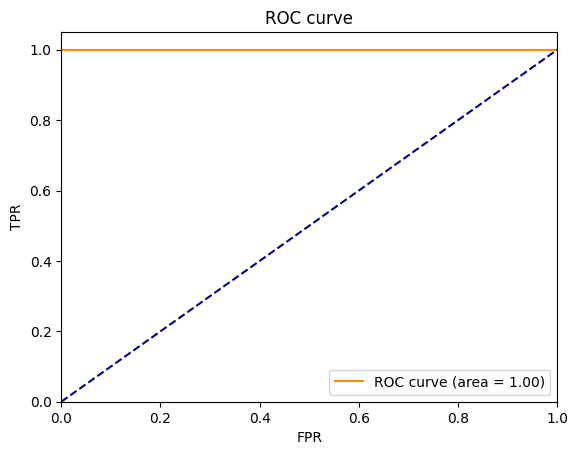

In [66]:
model.roc_auc_plot(y_test, proba)

In [67]:
model.report(y_test, y_pred)

Error calculating ndcg_score: Only ('multilabel-indicator', 'continuous-multioutput', 'multiclass-multioutput') formats are supported. Got binary instead
Error calculating dcg_score: Only ('multilabel-indicator', 'continuous-multioutput', 'multiclass-multioutput') formats are supported. Got binary instead
Error calculating fbeta_score: missing a required argument: 'beta'
Error calculating label_ranking_average_precision_score: binary format is not supported


c:\interpreter\Lib\site-packages\sklearn\metrics\_ranking.py:2025: UndefinedMetricWarning: 'k' (2) greater than or equal to 'n_classes' (2) will result in a perfect score and is therefore meaningless.
  warnings.warn(


{'accuracy_score': 1.0,
 'precision_score': 1.0,
 'recall_score': 1.0,
 'f1_score': 1.0,
 'd2_absolute_error_score': 1.0,
 'completeness_score': 1.0,
 'homogeneity_score': 1.0,
 'jaccard_score': 1.0,
 'brier_score_loss': 0.0,
 'd2_tweedie_score': 1.0,
 'cohen_kappa_score': 1.0,
 'd2_pinball_score': 1.0,
 'mutual_info_score': 0.6859298002523728,
 'adjusted_mutual_info_score': 1.0,
 'average_precision_score': 1.0,
 'balanced_accuracy_score': 1.0,
 'top_k_accuracy_score': 1.0,
 'roc_auc_score': 1.0,
 'gini': 1.0}

In [161]:
fitted_models = model.fit_all(x_train, y_train)

!Default models! 

===============BernoulliNB===============
WAS FITTED SUCCESSFULLY

===============CalibratedClassifierCV===============
WAS FITTED SUCCESSFULLY

===============CategoricalNB===============
WAS FITTED SUCCESSFULLY

===============ClassifierChain===============
FITTING FAILED: ClassifierChain.__init__() missing 1 required positional argument: 'base_estimator'

===============ComplementNB===============
WAS FITTED SUCCESSFULLY

===============DecisionTreeClassifier===============
WAS FITTED SUCCESSFULLY

===============DummyClassifier===============
WAS FITTED SUCCESSFULLY

===============ExtraTreeClassifier===============
WAS FITTED SUCCESSFULLY

===============FixedThresholdClassifier===============
FITTING FAILED: FixedThresholdClassifier.__init__() missing 1 required positional argument: 'estimator'

===============GaussianNB===============
WAS FITTED SUCCESSFULLY

===============GaussianProcessClassifier===============
WAS FITTED SUCCESSFULLY

===============KNeigh

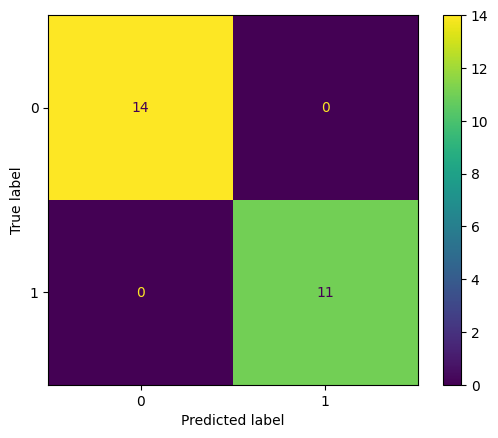

In [172]:
model.confusion_matrix_display(x_test, y_test)

c:\interpreter\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


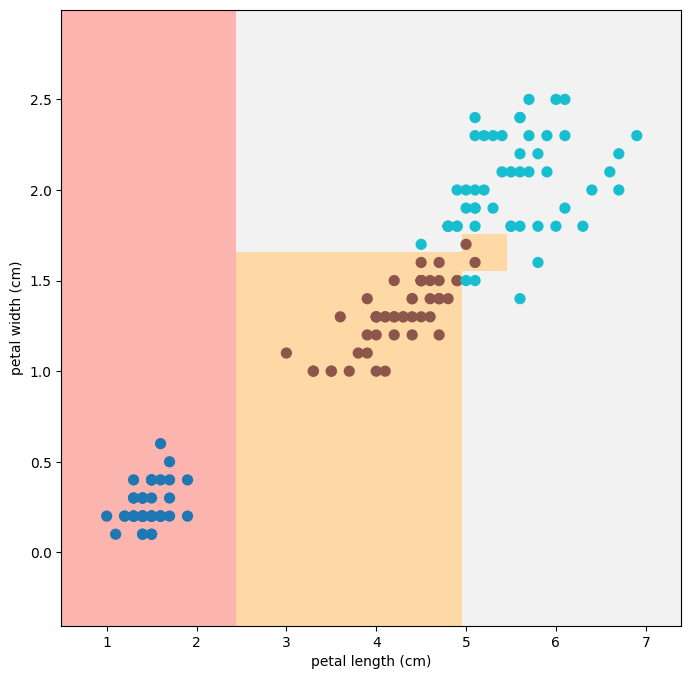

DecisionTreeClassifier()

In [57]:
model.test_tree_classification(Xcut, y, cy=y['target'])

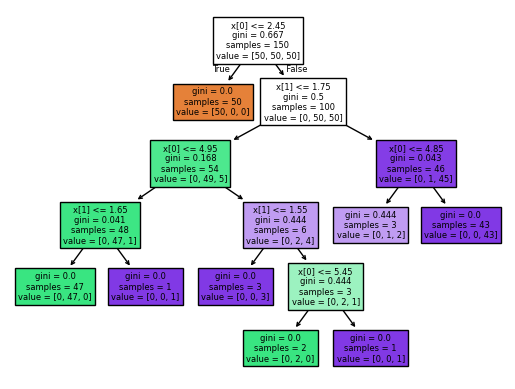

In [58]:
model.tree_plot(filled=True)

## Кластеризация

In [59]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

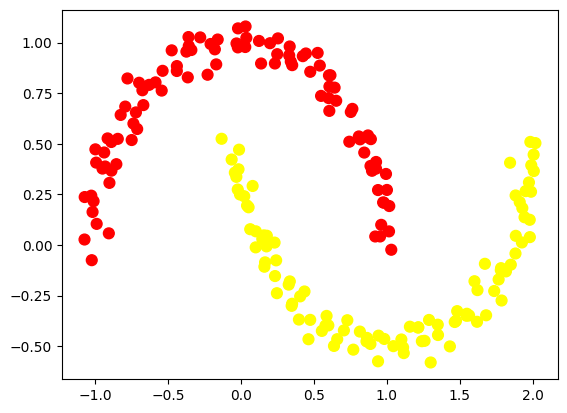

In [60]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn', s=60);

In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled.mean(axis=0), X_scaled.std(axis=0)

(array([ 1.37667655e-16, -1.32671651e-16]), array([1., 1.]))

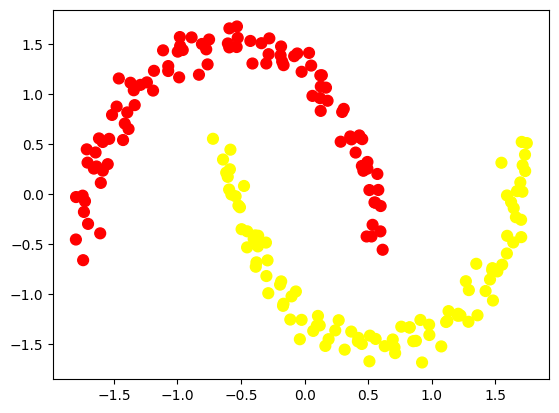

In [62]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='autumn', s=60);

In [63]:
model = Cluster(AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='average'))

In [64]:
model.fit(X_scaled)

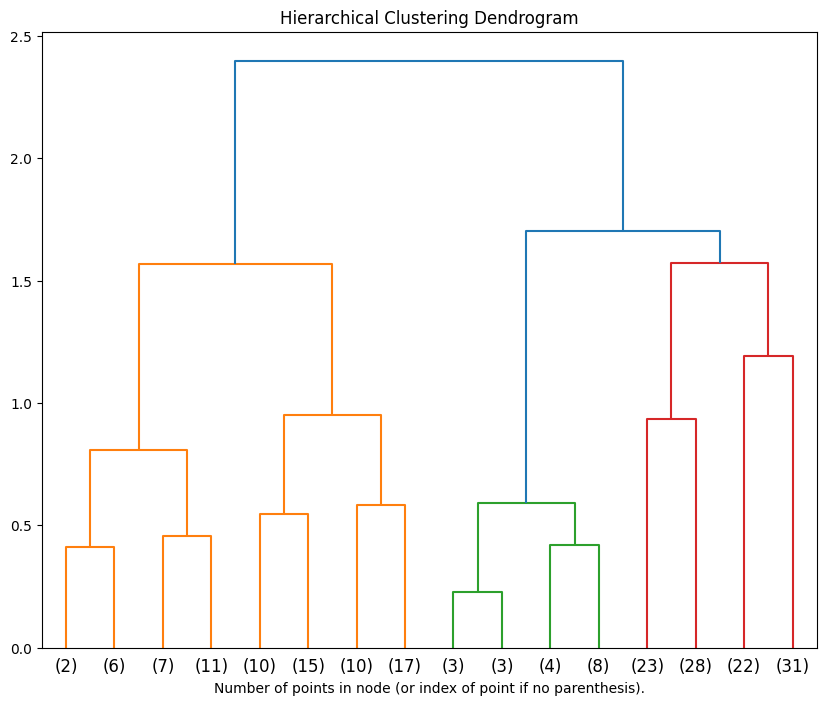

In [65]:
model.dendrogram_plot(truncate_mode='level', p=3)

In [66]:
model = Cluster(KMeans(2))

In [67]:
wcss = model.elbow_method(X_scaled, 11)

Your model's parameter 'n_clusters' was changed to optimal: 2 and model was fitted on it.


In [68]:
model.fit(X_scaled)

In [69]:
model.labels_

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1])

In [70]:
model.report(X_scaled, y)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18876\1600129350.py:222: RuntimeWarning: invalid value encountered in divide
  return np.mean(2 * np.abs(y_pred - y_true) / (y_true + y_pred))


{'Silhouette Score': 0.49304627727701233,
 'Calinski-Harabasz Index': 278.43954337455546,
 'Davies-Bouldin Index': 0.8062106981225065,
 'Dunn Index': 0.019896630401548227,
 'V-Measure': 0.4029028377563873,
 'Adjusted Rand Index': 0.5015957062647948,
 'Rand Index': 0.7508040201005025,
 'Symmetric Mean Absolute Percentage Error (SMAPE)': nan,
 'Mean_Absolute_Percentage_Error': 337769972052787.2,
 'Normalized Mutual Information (NMI)': 0.4029028377563873,
 'Fowlkes-Mallows Index (FMI)': 0.7495581040819798,
 'Calinski-Harabasz Index (CHI)': 278.43954337455546,
 'Davies-Bouldin Index (DBI)': 0.8062106981225065}

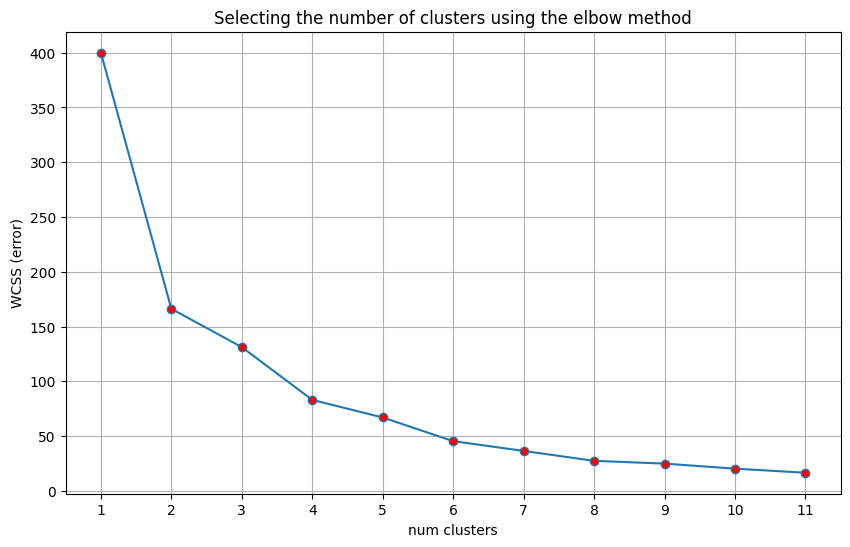

In [71]:
model.elbow_method_plot(wcss)